# Clustering in Human Resources Management

As described in my earlier notebook, we will be building a Clustering model to group employees with similar characteristics to segment the workforce into "buckets" for broad talent-development strategies.

In [1]:
#basic libraries
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint #pretty printing

#define graph settings
sns.set(style = "whitegrid")

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#machine learning packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

%matplotlib inline

## <mark> Initilize the dataset

In [2]:
df = pd.read_csv("dummy_HR_data_ML.csv")
pd.set_option('display.max_columns', None)
df.head()

,emp_id,BusinessUnit_Primary,Function,Country,Pay_Grade,EmpDuration_Company,EmpDuration_Position,Gender,Age_Decade,Race,Graduate,AttritionRisk,ForeignCountry,Position_>3Y,Position_>5Y,Seniority,JobTitleAgg,PromoEligibility,TargetedRoleIdentified,PerformanceRank_Current,PerformanceRank_LastYear,PotentialRank_Current,PotentialRank_LastYear,ChangeInPerformanceRank,ChangeInPotentialRank
0,1,BU_P1,Others,GL,1,15.0,12.5,Female,5,Hispano,No,1,0,1,1,1,Admin Assistant,0,0,2,2,2,2,0,0
1,2,BU_P1,Others,GL,1,15.0,12.5,Female,4,British,No,1,0,1,1,1,Admin Assistant,0,0,2,2,2,2,0,0
2,3,BU_P1,Sales & Marketing,GL,5,12.5,12.5,Male,6,British,No,1,1,1,1,3,Manager,0,0,2,2,2,2,0,0
3,4,BU_P1,Sales & Marketing,GL,3,2.0,2.0,Female,4,Chinese,No,1,1,0,0,2,Adviser,0,0,3,3,3,3,0,0
4,5,BU_P1,Sales & Marketing,CA,2,15.0,2.0,Female,5,Scottish,No,1,0,0,0,1,Analyst,0,0,3,3,3,3,0,0


In [3]:
#defining the list of columns for clustering exercise
target_col = ['Age_Decade', 'Seniority', 'Pay_Grade', 
              'EmpDuration_Company', 'EmpDuration_Position', 
              'PromoEligibility', 'AttritionRisk',
              'PerformanceRank_Current', 'PotentialRank_Current']

In [4]:
#scale the features
data = df[target_col]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

To overcome the issue of initialization sensitivity with K-means, we will use K-Means++, a smart centroid initialization technique:
- K-Means++ will pick the first centroid point (C_1) randomly,
- Compute distance of all points in the dataset from the selected centroid. The distance of x_i point from the farthest centroid can be computed by d_i = max(j:1->m)||x_i - C_j||^2
- Make the point x_i as the new centroid that is having the maximum probability proportional to d_i
- Repeat the above 2 steps until you kind k-centroids

In [5]:
#defining the KMeans function with initialization as k-means++
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++')
#fitting the KMeans model to scaled data
kmeans2.fit(data_scaled)

KMeans(n_clusters=2)

In [6]:
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++')
kmeans3.fit(data_scaled)

KMeans(n_clusters=3)

In [7]:
kmeans4 = KMeans(n_clusters = 4, init = 'k-means++')
kmeans4.fit(data_scaled)

KMeans(n_clusters=4)

In [8]:
kmeans5 = KMeans(n_clusters = 5, init = 'k-means++')
kmeans5.fit(data_scaled)

KMeans(n_clusters=5)

In [9]:
kmeans6 = KMeans(n_clusters = 6, init = 'k-means++')
kmeans6.fit(data_scaled)

KMeans(n_clusters=6)

In [10]:
kmeans7 = KMeans(n_clusters = 7, init = 'k-means++')
kmeans7.fit(data_scaled)

KMeans(n_clusters=7)

In [11]:
kmeans8 = KMeans(n_clusters = 8, init = 'k-means++')
kmeans8.fit(data_scaled)

KMeans()

In [12]:
kmeans9 = KMeans(n_clusters = 9, init = 'k-means++')
kmeans9.fit(data_scaled)

KMeans(n_clusters=9)

#### Evaluating Clustering models

- **Within Cluster Sum of Squares (WCSS):** Intuitively, clusters should have minimal dispersion and therefore minimal WCSS. WCSS is also referred to as **inertia**
- **Between Cluster Sum of Squares (BCSS):** While WCSS measures how tight the clusters are, BCSS is a measure of the separation of the clusters. To compute BCSS, observe that the **Total Sum of Squares (TSS)** = WCSS + BCSS; TSS is the variance of all data points, and BCSS is then just the difference between TSS and WCSS
- **Silhouette Coefficient (SC):** Measures the ratio between the distances within a cluster and distances to the nearest adjacent cluster. Values lie between -1 and 1. If the clusters are compact and well separated from adjacenters, then SC > 0. If the data points within the clusters are dispersed and not well separated from adjacent clusters, then SC < 0. Ideally, you want a model with SC values close to 1.

In [13]:
km_models = [kmeans2, kmeans3, kmeans4, kmeans5, kmeans6, kmeans7]

#evaluating the KMeans model with WCSS and BCSS
def plot_WCSS(km_models, samples):
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    
    #plot the WCSS
    wcss = [mod.inertia_ for mod in km_models]
    n_clusts = range(2, len(wcss) + 2)
    ax[0].bar(n_clusts, wcss)
    ax[0].set_xlabel("Number of clusters")
    ax[0].set_ylabel("WCSS")
    
    #plot the BCSS = TSS - WCSS
    n_1 = (float(samples.shape[0]) * float(samples.shape[1])) - 1.0
    tss = n_1 * np.var(samples)
    bcss = [tss - x for x in wcss]
    ax[1].bar(n_clusts, bcss)
    ax[1].set_xlabel("Number of clusters")
    ax[1].set_ylabel("BCSS")
    plt.show()

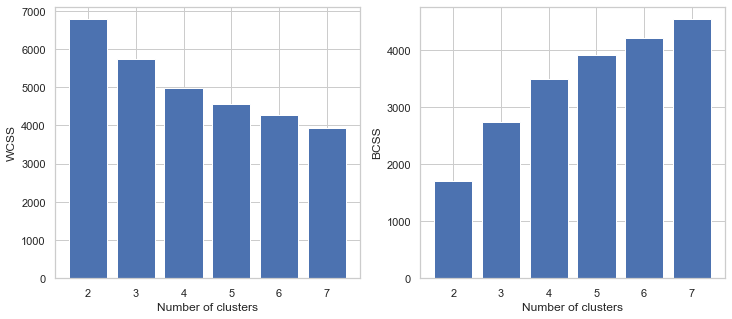

In [14]:
plot_WCSS(km_models, data_scaled)

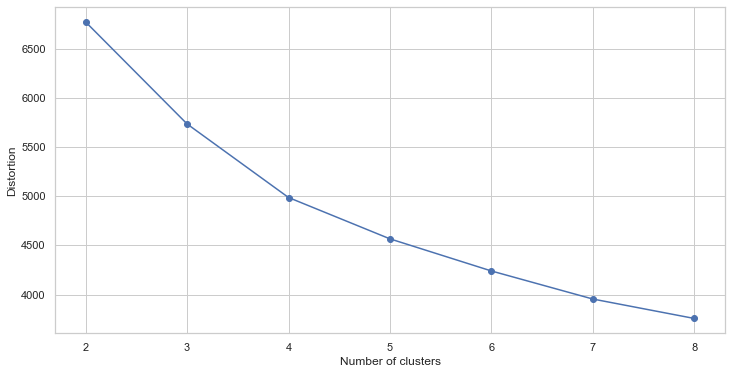

In [15]:
#constructing the elbow curve
distortions = []
for i in range (2, 9):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(data_scaled)
    distortions.append(km.inertia_)
    
#plot the elbow curve
plt.figure(figsize = (12, 6))
plt.plot(range(2, 9), distortions, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

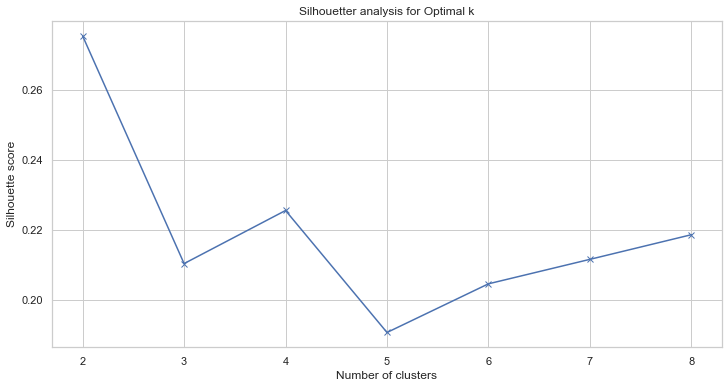

In [16]:
#finding the optimal number of clusters with silhouette curve
def find_k_sil(data_scaled):
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    silhouette_avg = []
    for num_clusters in range_n_clusters:
        #initialise KMeans
        kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++')
        kmeans.fit(data_scaled)
        cluster_labels = kmeans.labels_
        #silhouette score
        silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))
        
    plt.figure(figsize = (12, 6))
    plt.plot(range_n_clusters, silhouette_avg, 'bx-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.title("Silhouetter analysis for Optimal k")
    plt.show()

find_k_sil(data_scaled)

In [17]:
prediction = kmeans4.predict(data_scaled)
#add the Cluster predictions as a column to the un-scaled dataframe
data['Cluster'] = prediction
data

,Age_Decade,Seniority,Pay_Grade,EmpDuration_Company,EmpDuration_Position,PromoEligibility,AttritionRisk,PerformanceRank_Current,PotentialRank_Current,Cluster
0,5,1,1,15.0,12.5,0,1,2,2,0
1,4,1,1,15.0,12.5,0,1,2,2,0
2,6,3,5,12.5,12.5,0,1,2,2,0
3,4,2,3,2.0,2.0,0,1,3,3,2
4,5,1,2,15.0,2.0,0,1,3,3,2
...,...,...,...,...,...,...,...,...,...,...
938,3,2,4,1.0,1.0,0,1,2,2,3
939,5,2,4,15.0,2.0,0,1,2,2,1
940,4,2,4,15.0,2.0,1,2,3,3,2
941,3,2,4,12.5,1.0,1,1,3,3,2


In [18]:
data_grouped = data.groupby('Cluster').apply(lambda x: x.describe())
data_grouped

Age_Decade   Seniority   Pay_Grade  EmpDuration_Company  \
Cluster                                                                  
0       count   79.000000   79.000000   79.000000            79.000000   
        mean     4.734177    1.987342    3.367089            13.132911   
        std      0.887359    0.759448    1.602700             2.450417   
        min      3.000000    1.000000    1.000000             7.500000   
        25%      4.000000    1.000000    2.000000            12.500000   
        50%      5.000000    2.000000    3.000000            15.000000   
        75%      5.000000    3.000000    5.000000            15.000000   
        max      7.000000    3.000000    6.000000            15.000000   
1       count  227.000000  227.000000  227.000000           227.000000   
        mean     3.797357    2.903084    5.259912             7.361233   
        std      0.800106    0.296498    0.636866             5.112183   
        min      2.000000    2.000000    4.000000             1.000000   
        25%      3.000000    3.000000    5.000000             2.000000   
        50%      4.000000    3.000000    5.000000             7.500000   
        75%      4.000000    3.000000    6.000000            12.500000   
        max      6.000000    3.000000    6.000000            15.000000   
2       count  194.000000  194.000000  194.000000           194.000000   
        mean     3.453608    2.056701    3.659794             6.373711   
        std      0.893507    0.749357    1.445999             4.842684   
        min      2.000000    1.000000    1.000000             1.000000   
        25%      3.000000    1.250000    3.000000             2.000000   
        50%      3.000000    2.000000    4.000000             4.000000   
        75%      4.000000    3.000000    5.000000            12.500000   
        max      6.000000    3.000000    7.000000            15.000000   
3       count  443.000000  443.000000  443.000000           443.000000   
        mean     3.530474    1.625282    2.769752             4.931151   
        std      0.907907    0.484597    1.051302             4.095895   
        min      2.000000    1.000000    1.000000             1.000000   
        25%      3.000000    1.000000    2.000000             2.000000   
        50%      3.000000    2.000000    3.000000             4.000000   
        75%      4.000000    2.000000    4.000000             7.500000   
        max      6.000000    2.000000    4.000000            15.000000   

               EmpDuration_Position  PromoEligibility  AttritionRisk  \
Cluster                                                                
0       count             79.000000         79.000000      79.000000   
        mean              10.936709          0.177215       1.151899   
        std                2.868225          0.384291       0.426332   
        min                4.000000          0.000000       1.000000   
        25%                7.500000          0.000000       1.000000   
        50%               12.500000          0.000000       1.000000   
        75%               12.500000          0.000000       1.000000   
        max               15.000000          1.000000       3.000000   
1       count            227.000000        227.000000     227.000000   
        mean               2.099119          0.215859       1.466960   
        std                1.631439          0.412326       0.625782   
        min                1.000000          0.000000       1.000000   
        25%                1.000000          0.000000       1.000000   
        50%                2.000000          0.000000       1.000000   
        75%                2.000000          0.000000       2.000000   
        max                7.500000          1.000000       3.000000   
2       count            194.000000        194.000000     194.000000   
        mean               2.198454          0.520619       1.603093   
        std                1.625747          0.500867     

In [19]:
for col in target_col:
    print(pd.crosstab(data['Cluster'], data[col]))

Age_Decade   2    3    4   5   6  7
Cluster                            
0            0    4   31  27  16  1
1            1   94   85  44   3  0
2           24   85   60  23   2  0
3           38  212  122  62   9  0
Seniority    1    2    3
Cluster                 
0           23   34   22
1            0   22  205
2           49   85   60
3          166  277    0
Pay_Grade   1   2    3    4    5   6  7
Cluster                                
0          16   7   17   17   15   7  0
1           0   0    0   24  120  83  0
2          17  28   38   52   41  16  2
3          72  91  147  133    0   0  0
EmpDuration_Company  1.0   2.0   4.0   7.5   12.5  15.0
Cluster                                                
0                       0     0     0    10    29    40
1                      24    55    18    47    53    30
2                      14    62    29    36    33    20
3                      66   151    71    88    53    14
EmpDuration_Position  1.0   2.0   4.0   7.5   12.5  15.0
C

In [ ]:
def cond_hists(df, plot_cols, grid_cols):
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col = grid_cols)
        grid1.map(plt.hist, col)
    return grid_cols

cond_hists(data, cols_to_analyze, 'Cluster')

### Hierarchical Clustering

In [ ]:
#drawing dendogram to help us decide number of clusters
plt.figure(figsize = (10, 6))
plt.title("Dendogram Chart")
dend = shc.dendogram(shc.linkage(data_scaled, method = "ward"))
plt.axhline(y = 35, color = "r", linestyle = "--")
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
a = cluster.fit_predict(data_scaled)

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(data_scaled[:,0], data_scaled[:,1], c = cluster.labels_)

In [ ]:
silhouette_score(data_scaled, a)